<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah, Associate Professor

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


### Name: Parham Bateni
### Student Number: 99105294

# MNIST Autoencoder (20 Points)

Corresponding TA: Aryan Ahadinia

In this problem, we want to train an autoencoder. Autoencoder is a type of neural network which is used for unsupervised tasks. Figure below is showing a simple autoencoder.

<center>
<img src="./assets/autoencoder.png" style="width: 50%">
</center>

We want to train a neural network which get a noisy image as input and denoise it in the output. We focus on MNIST dataset. MNIST is a dataset containing 60000 images of hand-written digits. We artificially add a random noise to images and then we train our network to get the noisy image as input and give the cleared image in the output.

<center>
<img src="./assets/desc.png" style="width: 50%">
</center>


If you have an nVidia CUDA-compatible GPU, you can proceed to install CUDA and a CUDA-compatible pytorch versions. You can also use Google Colaboratory or Kaggle.
 

In [3]:
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install torch torchvision torchaudio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn

from tqdm import tqdm


In cell below, we load our data.

In [5]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

mnist_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
mnist_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Now we want to wrap our dataset in torch datasets. Each item in our dataset must contain three entities, the noisy image, the original image and the label. Apply a noise on the original image regarding the noise factor.

Complete cell below. (3 Points)


In [6]:
class NoisyDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, noise_factor=0.5):
        ####################################
        ###### Code Here (0.5 Points) ######
        ####################################
        self.dataset=dataset
        self.noise_factor=noise_factor

    def __getitem__(self, index):
        ####################################
        ####### Code Here (2 Points) #######
        ####################################
        image=self.dataset[index][0]
        noisy_image=image+torch.randn(1,28,28)*self.noise_factor
        return (noisy_image,image,self.dataset[index][1])

    def __len__(self):
        ####################################
        ###### Code Here (0.5 Points) ######
        ####################################
        return len(self.dataset)


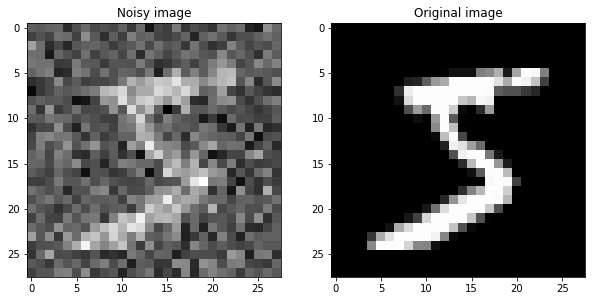

In [7]:
#Testing the NoisyDataset
noisy_mnist_train = NoisyDataset(mnist_train, 0.6)
s1=noisy_mnist_train.__getitem__(0)
figs,ax=plt.subplots(1,2,figsize=(10,20))
ax[0].set_title('Noisy image')
ax[0].imshow(s1[0].reshape(28,28),cmap='gray')
ax[1].set_title('Original image')
ax[1].imshow(s1[1].reshape(28,28),cmap='gray')
plt.show()

In [8]:
device=torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [10]:
noisy_mnist_train = NoisyDataset(mnist_train, 0.6)
noisy_mnist_test = NoisyDataset(mnist_test, 0.6)
mnist_train_loader = torch.utils.data.DataLoader(
    noisy_mnist_train, batch_size=60, shuffle=True
)
mnist_test_loader = torch.utils.data.DataLoader(
    noisy_mnist_test, batch_size=60, shuffle=True
)


Now, design a proper network architecture. Complete cell below. (6 Points)

In [82]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ############################
        ### Code Here (5 Points) ###
        ############################
        self.network = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(784,49),
            torch.nn.Tanh(),
            torch.nn.Linear(49,10),
            torch.nn.Tanh(),
            torch.nn.Linear(10,49),
            torch.nn.Tanh(),
            torch.nn.Linear(49,784)
        )

    def forward(self, img):
        ############################
        ### Code Here (1 Points) ###
        ############################
        return self.network(img)


Now, train the network. We recommend MSE Loss and Adam Optimizer. (6 Points)

In [83]:
############################
### Code Here (6 Points) ###
############################
learning_rate=0.001
count_epochs=2
nn_model=Net().to(device)
loss_function=torch.nn.MSELoss()
optimizer=torch.optim.Adam(nn_model.parameters(),lr=learning_rate)
def train(dataloader,model, loss_function,optimizer,count_epochs):
  train_loss=[]
  for epoch in range(count_epochs):
    for batch,(Noisy_image,Original_image,label) in tqdm(enumerate(dataloader)):
        pred=model(Noisy_image.to(device))
        loss=loss_function(pred,Original_image.to(device).reshape(-1,784))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())
        if (batch%100)==0:
          print(f'Epoch: {epoch}, Batch: {batch}/{len(dataloader)}, Loss= {loss.item()}')
  return train_loss
train_loss=train(mnist_train_loader,nn_model,loss_function,optimizer,count_epochs)

8it [00:00, 37.55it/s]

Epoch: 0, Batch: 0/1000, Loss= 0.9430900812149048


106it [00:02, 40.01it/s]

Epoch: 0, Batch: 100/1000, Loss= 0.25549426674842834


206it [00:05, 40.34it/s]

Epoch: 0, Batch: 200/1000, Loss= 0.2423693984746933


307it [00:07, 37.84it/s]

Epoch: 0, Batch: 300/1000, Loss= 0.22535909712314606


408it [00:10, 40.90it/s]

Epoch: 0, Batch: 400/1000, Loss= 0.20393453538417816


506it [00:12, 39.45it/s]

Epoch: 0, Batch: 500/1000, Loss= 0.19433198869228363


607it [00:15, 39.81it/s]

Epoch: 0, Batch: 600/1000, Loss= 0.1933462768793106


705it [00:17, 39.83it/s]

Epoch: 0, Batch: 700/1000, Loss= 0.18029794096946716


807it [00:20, 41.50it/s]

Epoch: 0, Batch: 800/1000, Loss= 0.18471933901309967


906it [00:22, 40.02it/s]

Epoch: 0, Batch: 900/1000, Loss= 0.17358924448490143


1000it [00:25, 39.70it/s]
8it [00:00, 38.30it/s]

Epoch: 1, Batch: 0/1000, Loss= 0.16932153701782227


108it [00:02, 39.62it/s]

Epoch: 1, Batch: 100/1000, Loss= 0.17522059381008148


207it [00:05, 40.41it/s]

Epoch: 1, Batch: 200/1000, Loss= 0.1603151112794876


306it [00:07, 40.02it/s]

Epoch: 1, Batch: 300/1000, Loss= 0.16314856708049774


409it [00:10, 40.35it/s]

Epoch: 1, Batch: 400/1000, Loss= 0.15183937549591064


509it [00:12, 40.35it/s]

Epoch: 1, Batch: 500/1000, Loss= 0.15891976654529572


606it [00:15, 41.03it/s]

Epoch: 1, Batch: 600/1000, Loss= 0.1690906286239624


705it [00:17, 41.81it/s]

Epoch: 1, Batch: 700/1000, Loss= 0.15983010828495026


808it [00:20, 40.53it/s]

Epoch: 1, Batch: 800/1000, Loss= 0.15594661235809326


908it [00:22, 41.92it/s]

Epoch: 1, Batch: 900/1000, Loss= 0.14760874211788177


1000it [00:25, 39.81it/s]


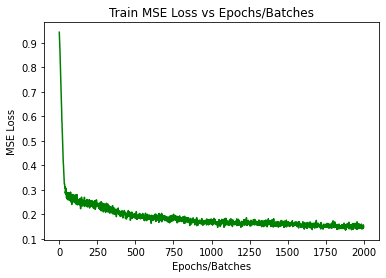

In [85]:
plt.title('Train MSE Loss vs Epochs/Batches')
plt.xlabel('Epochs/Batches')
plt.ylabel('MSE Loss')
plt.plot(np.arange(0,len(train_loss)),train_loss,color='green')
plt.show()

In [84]:
def test(dataloader,model, loss_function):
  test_loss=list()
  for batch,(Noisy_image,Original_image,label) in tqdm(enumerate(dataloader)):
      pred=model(Noisy_image.to(device))
      loss=loss_function(pred,Original_image.to(device).reshape(-1,784))

      test_loss.append(loss.item())
  return sum(test_loss)
test_loss=test(mnist_test_loader,nn_model,loss_function)
print(f'Test MSE loss is: {test_loss}')

167it [00:03, 43.33it/s]

Test MSE loss is: 24.720574662089348


Now, plot the results like figure above. (5 Points)

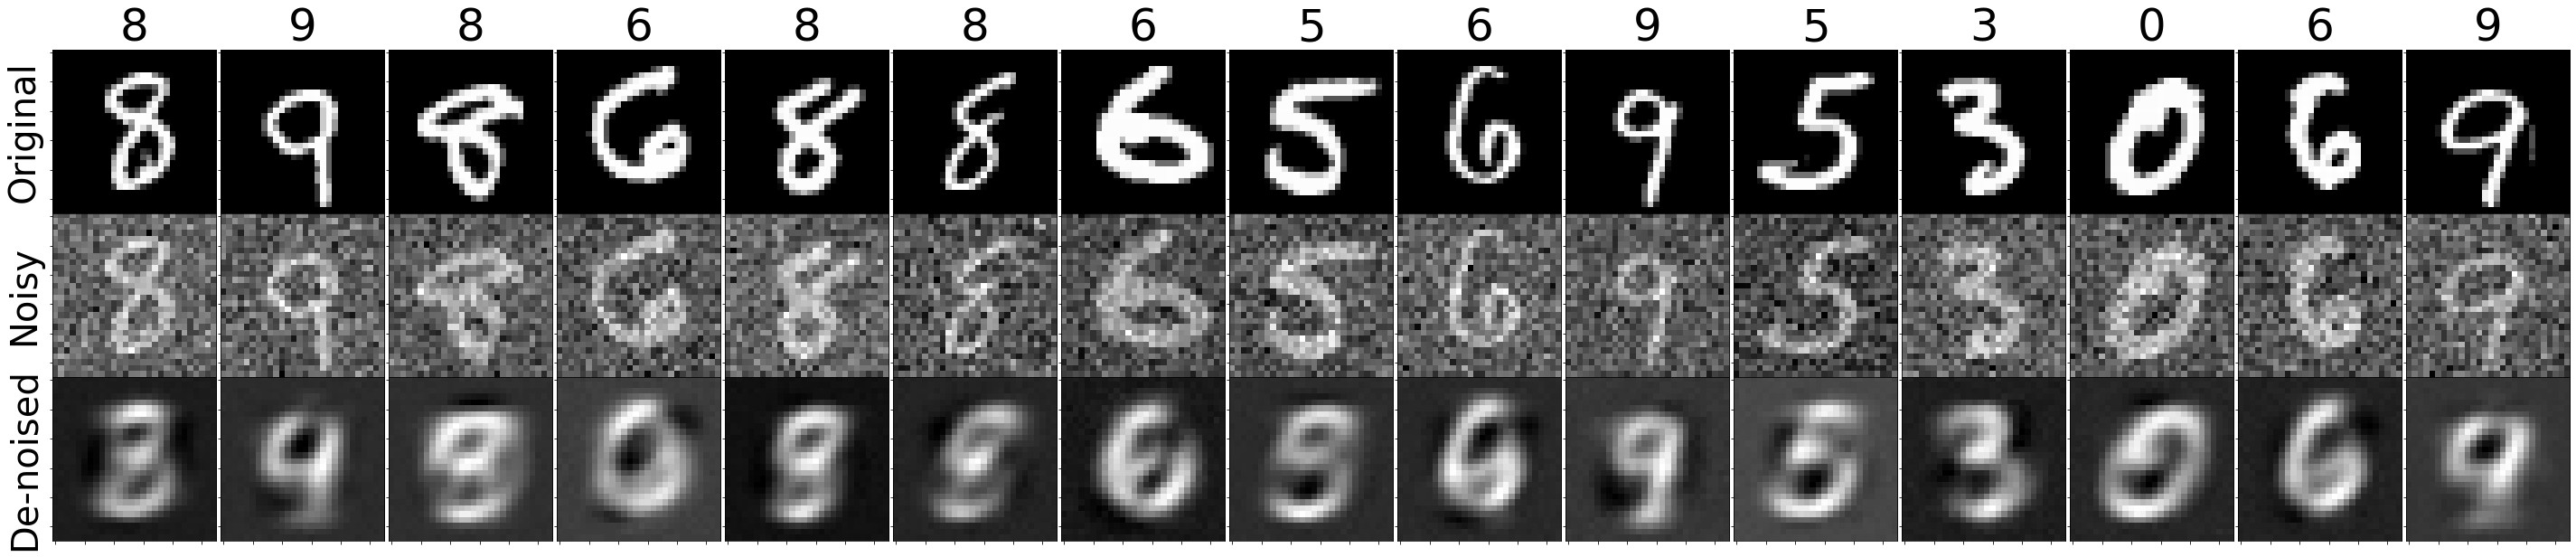

In [86]:
############################
### Code Here (5 Points) ###
############################
count_images=15
random_indices=np.random.randint(0,len(noisy_mnist_test),15)
Original_images=[]
Noisy_images=[]
labels=[]
for i in random_indices:
  Noisy_images.append(noisy_mnist_test[i][0])
  Original_images.append(noisy_mnist_test[i][1])
  labels.append(noisy_mnist_test[i][2])

fig,axes=plt.subplots(3,count_images,figsize=(50,10))
for i in range(3):
  for j in range(count_images):
    if i==0:
      axes[i][j].set_title(labels[j],fontdict={'fontsize':50})
    if j==0:
      if i==0:
        axes[i][j].set_ylabel('Original',fontdict={'fontsize':40})
      elif i==1:
        axes[i][j].set_ylabel('Noisy',fontdict={'fontsize':40})
      else:
        axes[i][j].set_ylabel('De-noised',fontdict={'fontsize':40})
    axes[i][j].set_xticklabels([])
    axes[i][j].set_yticklabels([])
    if i==0:
      axes[i][j].imshow(Original_images[j].reshape(28,28),cmap='gray')
    elif i==1:
      axes[i][j].imshow(Noisy_images[j].reshape(28,28),cmap='gray')
    else:
      axes[i][j].imshow(nn_model(Noisy_images[j].to(device)).to('cpu').detach().numpy().reshape(28,28),cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
